In [1]:
import pandas as pd
import astropy as ap
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# from astropy.io import fits
import pdb
from scipy.ndimage.filters import maximum_filter1d
import glob
import fitsio as fits

In [2]:
from multiprocessing.pool import Pool

In [3]:
indir = 'tess/16/'

In [4]:
outdir = 'tess/processed/'
os.makedirs(outdir, exist_ok=True)

In [5]:
files = glob.glob(os.path.join(indir, '*.fits'))

In [26]:
def proc(filename, w=50, max_len=250):
    outname = outdir + filename.split(indir)[1]
    outname = outname.split('.')[0] + '.npy'
    try:
        data = fits.read(filename, ext=None)
    except:
        return
    data = data.astype([(x, '<f8') for x in data.dtype.names])
    time = data['TIME']
    bool_time = ~np.isnan(time)
    sap_flux_o_err = data['SAP_FLUX']/data['SAP_FLUX_ERR']
    sap_flux_o_err = sap_flux_o_err/np.nanmax(sap_flux_o_err)
    bool_flux = ~np.isnan(sap_flux_o_err)
    valid = (bool_flux == bool_time) & (bool_time == True)
    time = time[valid]
    sap_flux_o_err = sap_flux_o_err[valid]
    assert(time.shape == sap_flux_o_err.shape)
    sap_flux_o_err = maximum_filter1d(sap_flux_o_err, size=w)
    res = np.stack([time, sap_flux_o_err])
    res = res[:, ::w]
    res = res[:, :max_len]
    np.save(outname, res)    

In [27]:
pool = Pool(2)

In [28]:
a = pool.map(proc, files)

In [29]:
pool.close()
pool.join()

In [ ]:
t, y = proc(files[12])

In [ ]:
sns.lineplot(t,y)

In [ ]:
x = np.stack([t,y])

In [ ]:
x.shape

In [11]:
test = files[10]

In [22]:
def proc2(filename, w=50, max_len=250):
    outname = outdir + filename.split(indir)[1]
    outname = outname.split('.')[0] + '.npy'
    try:
        data = fits.read(filename, ext=None)
    except:
        return
    data = data.astype([(x, '<f8') for x in data.dtype.names])
    time = data['TIME']
    bool_time = ~np.isnan(time)
    sap_flux_o_err = data['SAP_FLUX']/data['SAP_FLUX_ERR']
    sap_flux_o_err = sap_flux_o_err/np.nanmax(sap_flux_o_err)
    bool_flux = ~np.isnan(sap_flux_o_err)
    valid = (bool_flux == bool_time) & (bool_time == True)
    time = time[valid]
    sap_flux_o_err = sap_flux_o_err[valid]
    assert(time.shape == sap_flux_o_err.shape)
    sap_flux_o_err = maximum_filter1d(sap_flux_o_err, size=w)
    res = np.stack([time, sap_flux_o_err])
    res = res[:, ::w]
    res = res[:, :250]
    return time, sap_flux_o_err, res

In [23]:
time, y, res = proc2(test)

In [25]:
res.shape

(2, 250)

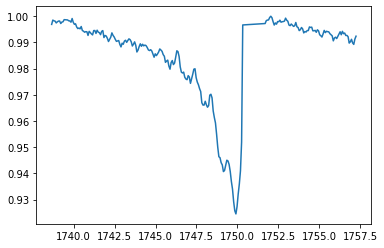

In [24]:
sns.lineplot(x=res[0], y=res[1])

In [18]:
dts = time[1:] - time[0:-1]

In [21]:
dts.min()

0.0013888912899346906